## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 
### Boston Dataset 

In [3]:
X,Y = bostonDataset.boston_data()
n_features = 13 
n_samples = 506 
n_target = 1 

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.748
Model:                            OLS   Adj. R-squared (uncentered):              0.739
Method:                 Least Squares   F-statistic:                              89.04
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                   4.28e-108
Time:                        10:45:01   Log-Likelihood:                         -288.00
No. Observations:                 404   AIC:                                      602.0
Df Residuals:                     391   BIC:                                      654.0
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

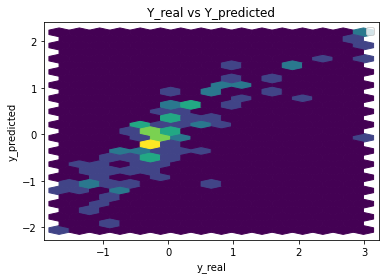

Performance Metrics
Mean Squared Error: 0.33674091951067736
Mean Absolute Error: 0.41884416266136837
Manhattan distance: 42.72210459145959
Euclidean distance: 5.860680318025296


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.2283777140218377


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.033215


0:	learn: 0.9569219	total: 58.6ms	remaining: 58.6s
1:	learn: 0.9378810	total: 59.8ms	remaining: 29.8s
2:	learn: 0.9173831	total: 60.9ms	remaining: 20.2s
3:	learn: 0.9017727	total: 62ms	remaining: 15.4s
4:	learn: 0.8870570	total: 63ms	remaining: 12.5s
5:	learn: 0.8699425	total: 64ms	remaining: 10.6s
6:	learn: 0.8530141	total: 64.9ms	remaining: 9.21s
7:	learn: 0.8363090	total: 65.8ms	remaining: 8.16s
8:	learn: 0.8211930	total: 66.8ms	remaining: 7.35s
9:	learn: 0.8066122	total: 67.7ms	remaining: 6.7s
10:	learn: 0.7914284	total: 68.6ms	remaining: 6.17s
11:	learn: 0.7773477	total: 69.5ms	remaining: 5.72s
12:	learn: 0.7633664	total: 70.3ms	remaining: 5.34s
13:	learn: 0.7497679	total: 71.3ms	remaining: 5.02s
14:	learn: 0.7384469	total: 72.1ms	remaining: 4.73s
15:	learn: 0.7244196	total: 73ms	remaining: 4.49s
16:	learn: 0.7116053	total: 73.9ms	remaining: 4.27s
17:	learn: 0.7006540	total: 74.7ms	remaining: 4.08s
18:	learn: 0.6885137	total: 75.5ms	remaining: 3.9s
19:	learn: 0.6777083	total: 76.5

120:	learn: 0.2871071	total: 159ms	remaining: 1.15s
121:	learn: 0.2857325	total: 160ms	remaining: 1.15s
122:	learn: 0.2846933	total: 161ms	remaining: 1.15s
123:	learn: 0.2833419	total: 162ms	remaining: 1.14s
124:	learn: 0.2819802	total: 162ms	remaining: 1.14s
125:	learn: 0.2811996	total: 163ms	remaining: 1.13s
126:	learn: 0.2797471	total: 164ms	remaining: 1.13s
127:	learn: 0.2786972	total: 165ms	remaining: 1.12s
128:	learn: 0.2776525	total: 166ms	remaining: 1.12s
129:	learn: 0.2768782	total: 167ms	remaining: 1.11s
130:	learn: 0.2761084	total: 167ms	remaining: 1.11s
131:	learn: 0.2751557	total: 168ms	remaining: 1.11s
132:	learn: 0.2741016	total: 169ms	remaining: 1.1s
133:	learn: 0.2730703	total: 170ms	remaining: 1.1s
134:	learn: 0.2719804	total: 171ms	remaining: 1.09s
135:	learn: 0.2708894	total: 171ms	remaining: 1.09s
136:	learn: 0.2703218	total: 172ms	remaining: 1.08s
137:	learn: 0.2696498	total: 173ms	remaining: 1.08s
138:	learn: 0.2690573	total: 173ms	remaining: 1.07s
139:	learn: 0.

160:	learn: 0.2501090	total: 192ms	remaining: 999ms
161:	learn: 0.2493580	total: 193ms	remaining: 997ms
162:	learn: 0.2486814	total: 194ms	remaining: 994ms
163:	learn: 0.2480079	total: 194ms	remaining: 991ms
164:	learn: 0.2475616	total: 195ms	remaining: 988ms
165:	learn: 0.2469936	total: 196ms	remaining: 985ms
166:	learn: 0.2460932	total: 197ms	remaining: 982ms
167:	learn: 0.2455015	total: 198ms	remaining: 979ms
168:	learn: 0.2447351	total: 199ms	remaining: 977ms
169:	learn: 0.2441179	total: 199ms	remaining: 974ms
170:	learn: 0.2435153	total: 200ms	remaining: 971ms
171:	learn: 0.2427652	total: 201ms	remaining: 969ms
172:	learn: 0.2422616	total: 202ms	remaining: 965ms
173:	learn: 0.2414427	total: 203ms	remaining: 962ms
174:	learn: 0.2408005	total: 203ms	remaining: 959ms
175:	learn: 0.2402955	total: 204ms	remaining: 956ms
176:	learn: 0.2395006	total: 205ms	remaining: 953ms
177:	learn: 0.2387990	total: 206ms	remaining: 951ms
178:	learn: 0.2382694	total: 207ms	remaining: 948ms
179:	learn: 

228:	learn: 0.2094245	total: 248ms	remaining: 834ms
229:	learn: 0.2088816	total: 249ms	remaining: 833ms
230:	learn: 0.2083541	total: 250ms	remaining: 831ms
231:	learn: 0.2076697	total: 251ms	remaining: 829ms
232:	learn: 0.2071785	total: 251ms	remaining: 827ms
233:	learn: 0.2064800	total: 252ms	remaining: 825ms
234:	learn: 0.2058229	total: 253ms	remaining: 823ms
235:	learn: 0.2054799	total: 254ms	remaining: 821ms
236:	learn: 0.2050261	total: 255ms	remaining: 820ms
237:	learn: 0.2046681	total: 255ms	remaining: 818ms
238:	learn: 0.2044018	total: 256ms	remaining: 816ms
239:	learn: 0.2038330	total: 257ms	remaining: 814ms
240:	learn: 0.2031802	total: 258ms	remaining: 813ms
241:	learn: 0.2027815	total: 259ms	remaining: 811ms
242:	learn: 0.2024613	total: 260ms	remaining: 809ms
243:	learn: 0.2019771	total: 261ms	remaining: 807ms
244:	learn: 0.2018025	total: 261ms	remaining: 806ms
245:	learn: 0.2014513	total: 262ms	remaining: 804ms
246:	learn: 0.2009204	total: 263ms	remaining: 802ms
247:	learn: 

349:	learn: 0.1669387	total: 349ms	remaining: 649ms
350:	learn: 0.1666843	total: 350ms	remaining: 648ms
351:	learn: 0.1663666	total: 351ms	remaining: 646ms
352:	learn: 0.1658315	total: 352ms	remaining: 645ms
353:	learn: 0.1654222	total: 353ms	remaining: 643ms
354:	learn: 0.1651504	total: 354ms	remaining: 642ms
355:	learn: 0.1648727	total: 354ms	remaining: 641ms
356:	learn: 0.1647144	total: 355ms	remaining: 640ms
357:	learn: 0.1643936	total: 356ms	remaining: 638ms
358:	learn: 0.1641409	total: 357ms	remaining: 637ms
359:	learn: 0.1638911	total: 358ms	remaining: 636ms
360:	learn: 0.1635251	total: 358ms	remaining: 634ms
361:	learn: 0.1634521	total: 359ms	remaining: 633ms
362:	learn: 0.1633798	total: 360ms	remaining: 632ms
363:	learn: 0.1630225	total: 361ms	remaining: 631ms
364:	learn: 0.1624410	total: 362ms	remaining: 629ms
365:	learn: 0.1621003	total: 362ms	remaining: 628ms
366:	learn: 0.1618641	total: 363ms	remaining: 627ms
367:	learn: 0.1616592	total: 364ms	remaining: 626ms
368:	learn: 

389:	learn: 0.1560833	total: 382ms	remaining: 598ms
390:	learn: 0.1557179	total: 383ms	remaining: 597ms
391:	learn: 0.1553558	total: 384ms	remaining: 596ms
392:	learn: 0.1548857	total: 385ms	remaining: 594ms
393:	learn: 0.1545007	total: 386ms	remaining: 593ms
394:	learn: 0.1544246	total: 386ms	remaining: 592ms
395:	learn: 0.1543296	total: 387ms	remaining: 591ms
396:	learn: 0.1540167	total: 388ms	remaining: 590ms
397:	learn: 0.1536954	total: 389ms	remaining: 589ms
398:	learn: 0.1532623	total: 390ms	remaining: 587ms
399:	learn: 0.1529778	total: 391ms	remaining: 586ms
400:	learn: 0.1527469	total: 392ms	remaining: 586ms
401:	learn: 0.1523997	total: 393ms	remaining: 585ms
402:	learn: 0.1519131	total: 394ms	remaining: 584ms
403:	learn: 0.1516454	total: 395ms	remaining: 582ms
404:	learn: 0.1512067	total: 396ms	remaining: 581ms
405:	learn: 0.1509314	total: 396ms	remaining: 580ms
406:	learn: 0.1508484	total: 397ms	remaining: 579ms
407:	learn: 0.1506301	total: 398ms	remaining: 577ms
408:	learn: 

455:	learn: 0.1379928	total: 439ms	remaining: 524ms
456:	learn: 0.1377503	total: 440ms	remaining: 523ms
457:	learn: 0.1373568	total: 441ms	remaining: 522ms
458:	learn: 0.1371438	total: 442ms	remaining: 521ms
459:	learn: 0.1368671	total: 442ms	remaining: 519ms
460:	learn: 0.1366883	total: 443ms	remaining: 518ms
461:	learn: 0.1365420	total: 444ms	remaining: 517ms
462:	learn: 0.1362963	total: 445ms	remaining: 516ms
463:	learn: 0.1359458	total: 446ms	remaining: 515ms
464:	learn: 0.1357695	total: 446ms	remaining: 514ms
465:	learn: 0.1355062	total: 447ms	remaining: 512ms
466:	learn: 0.1351847	total: 448ms	remaining: 511ms
467:	learn: 0.1350133	total: 449ms	remaining: 510ms
468:	learn: 0.1347308	total: 450ms	remaining: 509ms
469:	learn: 0.1344342	total: 451ms	remaining: 508ms
470:	learn: 0.1340931	total: 452ms	remaining: 507ms
471:	learn: 0.1336534	total: 452ms	remaining: 506ms
472:	learn: 0.1334838	total: 453ms	remaining: 505ms
473:	learn: 0.1332112	total: 454ms	remaining: 504ms
474:	learn: 

576:	learn: 0.1111625	total: 540ms	remaining: 396ms
577:	learn: 0.1109335	total: 541ms	remaining: 395ms
578:	learn: 0.1107042	total: 542ms	remaining: 394ms
579:	learn: 0.1104640	total: 543ms	remaining: 393ms
580:	learn: 0.1103447	total: 544ms	remaining: 392ms
581:	learn: 0.1101754	total: 545ms	remaining: 391ms
582:	learn: 0.1101297	total: 545ms	remaining: 390ms
583:	learn: 0.1099395	total: 546ms	remaining: 389ms
584:	learn: 0.1097916	total: 547ms	remaining: 388ms
585:	learn: 0.1097246	total: 548ms	remaining: 387ms
586:	learn: 0.1096225	total: 549ms	remaining: 386ms
587:	learn: 0.1094256	total: 549ms	remaining: 385ms
588:	learn: 0.1091646	total: 550ms	remaining: 384ms
589:	learn: 0.1090034	total: 551ms	remaining: 383ms
590:	learn: 0.1088094	total: 552ms	remaining: 382ms
591:	learn: 0.1086270	total: 553ms	remaining: 381ms
592:	learn: 0.1083097	total: 553ms	remaining: 380ms
593:	learn: 0.1080895	total: 554ms	remaining: 379ms
594:	learn: 0.1079048	total: 555ms	remaining: 378ms
595:	learn: 

616:	learn: 0.1041541	total: 573ms	remaining: 355ms
617:	learn: 0.1040228	total: 574ms	remaining: 355ms
618:	learn: 0.1038700	total: 574ms	remaining: 354ms
619:	learn: 0.1037107	total: 575ms	remaining: 353ms
620:	learn: 0.1035944	total: 576ms	remaining: 352ms
621:	learn: 0.1033753	total: 577ms	remaining: 351ms
622:	learn: 0.1031615	total: 578ms	remaining: 350ms
623:	learn: 0.1029945	total: 579ms	remaining: 349ms
624:	learn: 0.1028132	total: 579ms	remaining: 348ms
625:	learn: 0.1026363	total: 580ms	remaining: 347ms
626:	learn: 0.1025051	total: 581ms	remaining: 346ms
627:	learn: 0.1023698	total: 582ms	remaining: 345ms
628:	learn: 0.1023029	total: 583ms	remaining: 344ms
629:	learn: 0.1020358	total: 584ms	remaining: 343ms
630:	learn: 0.1018258	total: 585ms	remaining: 342ms
631:	learn: 0.1016684	total: 586ms	remaining: 341ms
632:	learn: 0.1014275	total: 587ms	remaining: 340ms
633:	learn: 0.1012480	total: 588ms	remaining: 339ms
634:	learn: 0.1010961	total: 588ms	remaining: 338ms
635:	learn: 

683:	learn: 0.0937021	total: 630ms	remaining: 291ms
684:	learn: 0.0935955	total: 631ms	remaining: 290ms
685:	learn: 0.0935264	total: 632ms	remaining: 289ms
686:	learn: 0.0933919	total: 633ms	remaining: 288ms
687:	learn: 0.0931597	total: 634ms	remaining: 287ms
688:	learn: 0.0930552	total: 634ms	remaining: 286ms
689:	learn: 0.0929978	total: 635ms	remaining: 285ms
690:	learn: 0.0927742	total: 636ms	remaining: 284ms
691:	learn: 0.0925596	total: 637ms	remaining: 283ms
692:	learn: 0.0923827	total: 637ms	remaining: 282ms
693:	learn: 0.0922473	total: 638ms	remaining: 281ms
694:	learn: 0.0920353	total: 639ms	remaining: 281ms
695:	learn: 0.0919350	total: 640ms	remaining: 280ms
696:	learn: 0.0918064	total: 641ms	remaining: 279ms
697:	learn: 0.0917753	total: 642ms	remaining: 278ms
698:	learn: 0.0916368	total: 643ms	remaining: 277ms
699:	learn: 0.0915088	total: 643ms	remaining: 276ms
700:	learn: 0.0914670	total: 644ms	remaining: 275ms
701:	learn: 0.0912488	total: 645ms	remaining: 274ms
702:	learn: 

803:	learn: 0.0775541	total: 731ms	remaining: 178ms
804:	learn: 0.0774362	total: 732ms	remaining: 177ms
805:	learn: 0.0772811	total: 733ms	remaining: 176ms
806:	learn: 0.0772359	total: 734ms	remaining: 175ms
807:	learn: 0.0770905	total: 735ms	remaining: 175ms
808:	learn: 0.0770545	total: 735ms	remaining: 174ms
809:	learn: 0.0769481	total: 736ms	remaining: 173ms
810:	learn: 0.0768188	total: 737ms	remaining: 172ms
811:	learn: 0.0767032	total: 738ms	remaining: 171ms
812:	learn: 0.0766134	total: 739ms	remaining: 170ms
813:	learn: 0.0764742	total: 740ms	remaining: 169ms
814:	learn: 0.0763484	total: 740ms	remaining: 168ms
815:	learn: 0.0762760	total: 741ms	remaining: 167ms
816:	learn: 0.0762085	total: 742ms	remaining: 166ms
817:	learn: 0.0760182	total: 743ms	remaining: 165ms
818:	learn: 0.0758993	total: 744ms	remaining: 164ms
819:	learn: 0.0758454	total: 745ms	remaining: 164ms
820:	learn: 0.0757653	total: 746ms	remaining: 163ms
821:	learn: 0.0756096	total: 747ms	remaining: 162ms
822:	learn: 

840:	learn: 0.0734058	total: 763ms	remaining: 144ms
841:	learn: 0.0733709	total: 764ms	remaining: 143ms
842:	learn: 0.0732618	total: 764ms	remaining: 142ms
843:	learn: 0.0731467	total: 765ms	remaining: 141ms
844:	learn: 0.0729999	total: 766ms	remaining: 140ms
845:	learn: 0.0729705	total: 767ms	remaining: 140ms
846:	learn: 0.0728067	total: 768ms	remaining: 139ms
847:	learn: 0.0727695	total: 768ms	remaining: 138ms
848:	learn: 0.0727192	total: 769ms	remaining: 137ms
849:	learn: 0.0726157	total: 770ms	remaining: 136ms
850:	learn: 0.0724990	total: 771ms	remaining: 135ms
851:	learn: 0.0723316	total: 772ms	remaining: 134ms
852:	learn: 0.0721966	total: 773ms	remaining: 133ms
853:	learn: 0.0720193	total: 774ms	remaining: 132ms
854:	learn: 0.0718570	total: 774ms	remaining: 131ms
855:	learn: 0.0717929	total: 775ms	remaining: 130ms
856:	learn: 0.0716484	total: 776ms	remaining: 129ms
857:	learn: 0.0716243	total: 777ms	remaining: 129ms
858:	learn: 0.0716013	total: 778ms	remaining: 128ms
859:	learn: 

908:	learn: 0.0666488	total: 820ms	remaining: 82.1ms
909:	learn: 0.0665461	total: 821ms	remaining: 81.2ms
910:	learn: 0.0665162	total: 822ms	remaining: 80.3ms
911:	learn: 0.0663997	total: 823ms	remaining: 79.4ms
912:	learn: 0.0662778	total: 824ms	remaining: 78.5ms
913:	learn: 0.0662520	total: 825ms	remaining: 77.6ms
914:	learn: 0.0661880	total: 826ms	remaining: 76.7ms
915:	learn: 0.0660521	total: 826ms	remaining: 75.8ms
916:	learn: 0.0660225	total: 827ms	remaining: 74.9ms
917:	learn: 0.0659207	total: 828ms	remaining: 74ms
918:	learn: 0.0658404	total: 829ms	remaining: 73.1ms
919:	learn: 0.0657968	total: 830ms	remaining: 72.2ms
920:	learn: 0.0656610	total: 831ms	remaining: 71.3ms
921:	learn: 0.0655847	total: 832ms	remaining: 70.4ms
922:	learn: 0.0654728	total: 833ms	remaining: 69.5ms
923:	learn: 0.0654440	total: 834ms	remaining: 68.6ms
924:	learn: 0.0653331	total: 834ms	remaining: 67.6ms
925:	learn: 0.0652671	total: 835ms	remaining: 66.7ms
926:	learn: 0.0652390	total: 836ms	remaining: 65

## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 5000
batch_size = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 0.8053766582044148
